In [4]:
import pandas, glob, pickle, scipy, re, collections, importlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import scipy.stats as scs
import sklearn
from sklearn.decomposition import PCA

rl = importlib.reload

#from scipy.spatial import distance
#from scipy.cluster import hierarchy

import figureMaker
import utils
from peaksList import peaksList

import blocks
rl(blocks)
from blocks import blocki, blockii, blockiii, blockiv

import countsColumnsNaming
import countsFileIO


rl(figureMaker)
rl(countsFileIO)
rl(countsColumnsNaming)
import heatmap2
rl(heatmap2)
prefix = '../v2/combined_filtered/'

fname_to_label = {
prefix + 'old_fbf2.txt': 'old_fbf2',
prefix + 'old_fbf1.txt': 'old_fbf1',
prefix + 'oo_both.txt': 'oo_both',
prefix + 'oo_fbf1.txt': 'oo_fbf1',
prefix + 'oo_fbf2.txt': 'oo_fbf2',
prefix + 'sp_both.txt': 'sp_both',
prefix + 'sp_fbf1.txt': 'sp_fbf1',
prefix + 'sp_fbf2.txt': 'sp_fbf2',
#prefix + 'old_fbf1_to_fbf2_n2.txt': 'old_fbf1_to_fbf2_n2',
}
label_to_fname = dict(zip(fname_to_label.values(), fname_to_label.keys()))


print("Creating heatmapMaker() object()...")
v = heatmap2.heatmapMaker()
v.load_peaks_csv_files(label_to_file=label_to_fname)
v.load_counts(fname='../v2/combined_counts.txt',
             total_read_numbers='../v2/total_read_numbers.txt')

pk = peaksList(dataframe=pandas.read_csv(
    '../v2/combined_filtered/oo_both.txt', sep='\t', index_col=False))
pk.read_sp_vs_oo_as_programs()
programs = pk.programs_as_public_names()

/Users/dfporter/pma/venv/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Creating heatmapMaker() object()...
Was able to read biotypes from peaks files.
Loading ../v2/combined_counts.txt as combined counts file.
RNA genes: 6
['rrn-4.5', 'rrn-4.16', 'rrn-2.1', 'rrn-3.56', 'rrn-3.1', 'rrn-4.15']

> ['LT FBF2_1', 'SP FBF_2', 'control_sp_1', 'LT FBF1_1', 'control_oo_3', 'LT FBF1_2', 'control_sp', 'OO FBF_2', 'control_oo_1', 'control_sp_3', 'control_oo', 'SP FBF_3', 'OO FBF_1', 'LT FBF2_3', 'control_oo_2', 'LT FBF1_3', 'OO FBF_3', 'SP FBF_1', 'control_sp_2', 'LT FBF2_2']
heatmap.rm_non_target_rnas(): self.targs.keys():  dict_keys(['old_fbf2', 'old_fbf1', 'oo_both', 'oo_fbf1', 'oo_fbf2', 'sp_both', 'sp_fbf1', 'sp_fbf2'])
Targets in peaks files:  2114
Kept 2111 targets
all_targ  2114
Targets here but not in self.targs:  set()
Targets in self.targs but not here:  {'F41E6.18', 'R144.18', 'C41C4.17'}
biotypes peaks in SP/OO (from gtf, not peaks file.):
---
Sum  2114
defaultdict(<class 'int'>, {'protein_coding': 2069, 'snoRNA': 7, 'ncRNA': 14, 'snRNA': 1, 'pseudogene'

+++
Created heatmapMaker() object(). Loading peaks files...
Dimensions: 2111 12


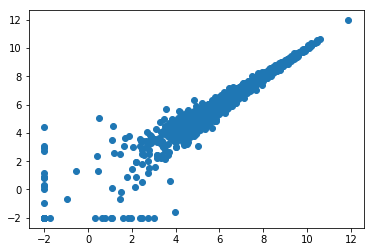

PCA:
Index(['$\mathrm{^{25^\circ C}Sp. FBF (1)}$',
       '$\mathrm{^{25^\circ C}Sp. FBF (2)}$',
       '$\mathrm{^{25^\circ C}Sp. FBF (3)}$',
       '$\mathrm{^{25^\circ C}Oo. FBF (1)}$',
       '$\mathrm{^{25^\circ C}Oo. FBF (2)}$',
       '$\mathrm{^{25^\circ C}Oo. FBF (3)}$',
       '$\mathrm{^{20^\circ C}Oo. FBF}$-$\mathrm{1 (1)}$',
       '$\mathrm{^{20^\circ C}Oo. FBF}$-$\mathrm{1 (2)}$',
       '$\mathrm{^{20^\circ C}Oo. FBF}$-$\mathrm{1 (3)}$',
       '$\mathrm{^{20^\circ C}Oo. FBF}$-$\mathrm{2 (1)}$',
       '$\mathrm{^{20^\circ C}Oo. FBF}$-$\mathrm{2 (2)}$',
       '$\mathrm{^{20^\circ C}Oo. FBF}$-$\mathrm{2 (3)}$'],
      dtype='object')
Explained variance: [0.83261307 0.0960524 ]
Singular values: [322.73251139 109.61632143]
get_params(): {'copy': True, 'iterated_power': 'auto', 'n_components': 2, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
_components: [[-0.22664902 -0.22406958 -0.21382961 -0.3444818  -0.32763946 -0.30708883
  -0.25881359 -0.26

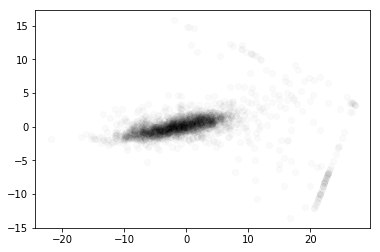

=====
60


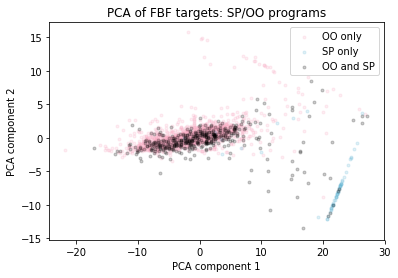

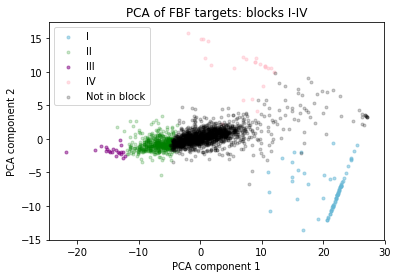

In [22]:

#print(v.targs)
from mpl_toolkits.mplot3d import Axes3D

def indexes_of_targets_in_a_group(df, group):
    rows = set()
    for val in group:
        if val in df.index:
            rows.add(df.index.get_loc(val))
    rows = np.array(list(rows))

    return rows



print('+++')



print("Created heatmapMaker() object(). Loading peaks files...")

fig, ax = plt.subplots()

df = v.counts_df

df = df[['SP FBF_1',
         'SP FBF_2', 'SP FBF_3',
         'OO FBF_1',
         'OO FBF_2', 'OO FBF_3',
         'LT FBF1_1', 'LT FBF1_2', 'LT FBF1_3',
         'LT FBF2_1', 'LT FBF2_2', 'LT FBF2_3'
        ]]

col_relabel_d = heatmap2.col_relabel()
df.columns = [col_relabel_d[x] for x in df.columns]

#print(df.head())

mat = df.as_matrix()
#mat[abs(mat)<3e-10] = 0.001
mat = np.clip(mat, -2, 1E6, out=mat)


#########
plt.clf()
X = mat
print("Dimensions:", len(X[:,0]), len(X[0,:]))

plt.scatter(X[:,0], X[:,1])
plt.show()
plt.clf()

pca = PCA(n_components=2, whiten=False)
pca.fit(X)
print("PCA:")
print(df.columns)
print("Explained variance:", pca.explained_variance_ratio_)
print("Singular values:", pca.singular_values_)
print('get_params():', pca.get_params())
print('_components:', pca.components_)
print('loading matrix:', pca.components_.T * np.sqrt(pca.explained_variance_))

X_r = pca.fit(X).transform(X)
print(X_r)
print(len(X_r))

fig = plt.figure()
plt.scatter(X_r[:,0], X_r[:,1], alpha=0.02, color='k')
fig.savefig('../v2/figs/pca_no_color_12_replicates.pdf')
plt.show()
plt.clf()

print("=====")
oo_prog = set([x for x in programs if re.search('[Oo]ogenic', programs[x])])
sp_prog = set([x for x in programs if re.search('[Ss]permatogenic', programs[x])])

oo = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, oo_prog - sp_prog))]
sp = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, sp_prog - oo_prog))]
both = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, sp_prog & oo_prog))]

#sp = X_r[np.array(indexes_of_targets_in_a_group(
#    v.counts_df, v.targs['old_fbf2'] - v.targs['old_fbf1']))]

#oo = X_r[np.array(indexes_of_targets_in_a_group(
#    v.counts_df, v.targs['old_fbf1'] - v.targs['old_fbf2']))]

#oo = X_r[np.array(indexes_of_targets_in_a_group(
#    v.counts_df, v.targs['old_fbf2'] - v.targs['oo_both']))]
print(len(sp))

fig = plt.figure()
size = 9  # 3
alpha = 0.2
#['#F9ADC5' oo, '#66B7D5' sp]
plt.scatter(oo[:,0], oo[:,1], alpha=alpha, color='#F9ADC5', s=size, label='OO only')
plt.scatter(sp[:,0], sp[:,1], alpha=alpha, color='#66B7D5', s=size, label='SP only')
plt.scatter(both[:,0], both[:,1], alpha=alpha, color='k', s=size, label='OO and SP')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA of FBF targets: SP/OO programs')
plt.legend()
fig.savefig('../v2/figs/pca_programs_12_replicates.pdf')
plt.show()
plt.clf()

bi = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, blocki))]
bii = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, blockii))]
biii = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, blockiii))]
biv = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, blockiv))]

not_in_block_targs = set(v.counts_df.index) - blocki - blockii - blockiii - blockiv
not_in_block = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, not_in_block_targs))]


fig = plt.figure()
plt.scatter(bi[:,0], bi[:,1], alpha=0.5, color='#66B7D5', s=size, label='I')
plt.scatter(bii[:,0], bii[:,1], alpha=alpha, color='g', s=size, label='II')
plt.scatter(biii[:,0], biii[:,1], alpha=0.5, color='purple', s=size, label='III')
plt.scatter(biv[:,0], biv[:,1], alpha=0.5, color='pink', s=size, label='IV')
plt.scatter(not_in_block[:,0], not_in_block[:,1], alpha=alpha, color='k', s=size, label='Not in block')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA of FBF targets: blocks I-IV')
plt.legend()
fig.savefig('../v2/figs/pca_blocks_12_replicates.pdf')
plt.show()
plt.clf()

if len(bi[0,:]) > 2:
    
    plt.scatter(bi[:,0], bi[:,2], alpha=0.05, color='b', label='I')
    plt.scatter(bii[:,0], bii[:,2], alpha=0.05, color='g', label='II')
    plt.scatter(biii[:,0], biii[:,2], alpha=0.1, color='purple', label='III')
    plt.scatter(not_in_block[:,0], not_in_block[:,2], alpha=0.01, color='k', label='Not in block')
    plt.show()
    plt.clf()

    plt.scatter(bi[:,1], bi[:,2], alpha=0.05, color='b')
    plt.scatter(bii[:,1], bii[:,2], alpha=0.05, color='g')
    plt.scatter(biii[:,1], biii[:,2], alpha=0.1, color='purple')
    plt.scatter(not_in_block[:,1], not_in_block[:,2], alpha=0.01, color='k')
    plt.show()
    plt.clf()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(bi[:,0], bi[:,1], bi[:,2], alpha=0.05, color='b')
    ax.scatter(bii[:,0], bii[:,1], bii[:,2], alpha=0.05, color='g')
    ax.scatter(biii[:,0], biii[:,1], biii[:,2], alpha=0.05, color='r')
    ax.scatter(not_in_block[:,0], not_in_block[:,1], not_in_block[:,2], alpha=0.05, color='k')
    plt.show()
    plt.clf()
#plt.scatter(bi[:,0], bi[:,3], alpha=0.05, color='b')
#plt.scatter(bii[:,0], bii[:,3], alpha=0.05, color='g')
#plt.scatter(biii[:,0], biii[:,3], alpha=0.1, color='r')
#plt.scatter(not_in_block[:,0], not_in_block[:,3], alpha=0.01, color='k')
#plt.show()
#plt.clf()
#plt.hexbin(X_r[:,0], X_r[:,1])#, alpha=0.01, color='k')
#plt.show()
#plt.clf()


(2111, 2)
Index(['R148.2', 'rme-2', 'F15A4.10', 'kin-20', 'Y45G12B.3', 'F14H3.5',
       'try-1', 'Y52B11A.8', 'ZK643.5', 'Y59E1B.t2', 'otub-4', 'unc-33',
       'meg-1', 'F43G6.3', 'emc-2', 'R07E4.5', 'K04C1.2', 'tpk-1', 'phf-5',
       'pqn-65', 'gmn-1', 'pnk-1', 'M01G5.3', 'F56F11.4', 'spsb-2',
       'Y39B6A.10', 'acs-13', 'spt-4', 'ceh-39', 'F08F3.6', 'fbxa-124',
       'Y48A6C.4', 'C34B4.2', 'spn-4', 'farl-11', 'T10C6.7', 'ZK813.7',
       'daf-2', 'rab-14', 'fbxc-50'],
      dtype='object', name='gene')
Rectangle contains:


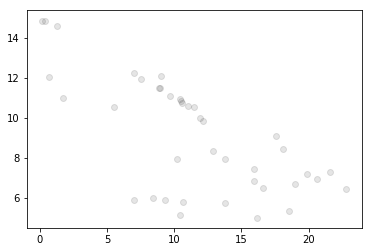

(40, 2)


In [23]:
#print(X)
def subset_to_rectangle(X, xlim, ylim, fname='../v2/tables/rectangle.xlsx'):
    condition = [( (xlim[0] <= x[0] <= xlim[1]) and (ylim[0] <= x[1] <= ylim[1]) ) for x in X]
    x = X[condition]
    names = df[condition].index
    print(names)
    print("Rectangle contains:",)
    for name in ['gld-1', 'fem-3', 'fbf-1', 'fbf-2']:
        if name in names:
            print(' ', name, ', ')
    plt.scatter(x[:,0], x[:,1], alpha=0.1, color='k')
    #plt.xlim(-23, 23)
    #plt.ylim(-11, 16)
    plt.show()
    plt.clf()
    
    df[condition].to_excel(fname)
    
    return x


print(X_r.shape)

x = subset_to_rectangle(X_r, [-25, 25], [5, 15], fname='../v2/tables/upper_oval.xlsx')
print(x.shape)
#x = subset_to_rectangle(X_r, [-50, 10], [-5, 0])

#plt.scatter(X_r[:,0], X_r[:,1], alpha=0.1, color='k')
#plt.show()
#plt.clf()


In [12]:
X = mat#np.array([[-1, -1, 0], [-2, -1, 0], [-3, -2, 0], [1, 1, 9], [2, 1, 9], [3, 2, 9]])
#X = X[0:1000]
print("Dimensions:", len(X[:,0]), len(X[0,:]))
print(X)


from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


similarities = euclidean_distances(X)
print('euclidean distances: {0} by {1}'.format(len(similarities), len(similarities[:,0])))
print(similarities)



mds = manifold.MDS(n_components=2, max_iter=300, eps=1e-2, 
                   dissimilarity="precomputed", n_jobs=1)
print(mds)
pos = mds.fit(similarities).embedding_
print(pos)

Dimensions: 2111 12
[[5.71341563 5.94966658 6.17491372 ... 5.97350361 6.13929187 5.7912285 ]
 [8.21795204 8.20549277 8.16390274 ... 8.62965256 8.65626615 8.70201548]
 [5.06151821 5.44224655 5.19528767 ... 5.25322355 4.17919296 5.25223857]
 ...
 [3.88902902 4.11324914 4.81573478 ... 4.91141805 4.12343613 4.76554739]
 [6.57578791 6.69160423 6.8165148  ... 5.17609084 4.97315158 5.32510209]
 [7.3888022  7.20478238 6.98733984 ... 7.22223878 6.87280559 7.24526618]]
euclidean distances: 2111 by 2111
[[ 0.          9.31293013  5.25230403 ...  4.65396531  5.4131936
   3.33225448]
 [ 9.31293013  0.         14.17939549 ... 13.3112134  13.51909633
   6.89262158]
 [ 5.25230403 14.17939549  0.         ...  3.74464587  3.23625747
   7.59458411]
 ...
 [ 4.65396531 13.3112134   3.74464587 ...  0.          5.25158311
   7.65979648]
 [ 5.4131936  13.51909633  3.23625747 ...  5.25158311  0.
   6.97293841]
 [ 3.33225448  6.89262158  7.59458411 ...  7.65979648  6.97293841
   0.        ]]
MDS(dissimilarity='

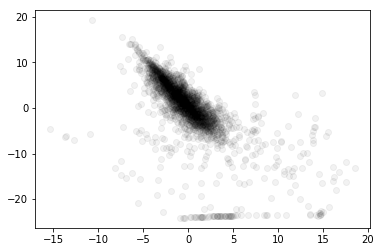

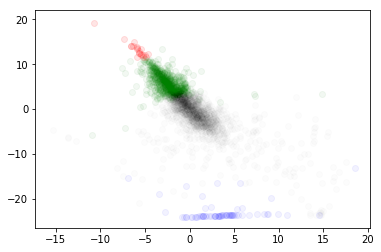

In [13]:
X_r = pos
bi = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, blocki))]
bii = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, blockii))]
biii = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, blockiii))]

not_in_block_targs = set(v.counts_df.index) - blocki - blockii - blockiii
not_in_block = X_r[np.array(indexes_of_targets_in_a_group(v.counts_df, not_in_block_targs))]

plt.scatter(pos[:,0], pos[:,1], alpha=0.05, c='k')
plt.show()
plt.clf()


plt.scatter(bi[:,0], bi[:,1], alpha=0.05, color='b')
plt.scatter(bii[:,0], bii[:,1], alpha=0.05, color='g')
plt.scatter(biii[:,0], biii[:,1], alpha=0.1, color='r')
plt.scatter(not_in_block[:,0], not_in_block[:,1], alpha=0.01, color='k')
plt.show()
plt.clf()


Dimensions: 2111 12
[[5.71341563 5.94966658 6.17491372 ... 5.97350361 6.13929187 5.7912285 ]
 [8.21795204 8.20549277 8.16390274 ... 8.62965256 8.65626615 8.70201548]
 [5.06151821 5.44224655 5.19528767 ... 5.25322355 4.17919296 5.25223857]
 ...
 [3.88902902 4.11324914 4.81573478 ... 4.91141805 4.12343613 4.76554739]
 [6.57578791 6.69160423 6.8165148  ... 5.17609084 4.97315158 5.32510209]
 [7.3888022  7.20478238 6.98733984 ... 7.22223878 6.87280559 7.24526618]]


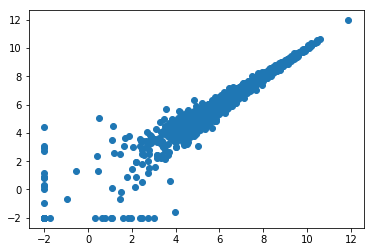

[[-0.19946315  0.29061044]
 [-9.42397666  0.10475536]
 [ 4.52035941 -0.22468998]
 ...
 [ 3.70693992  2.1448657 ]
 [ 3.60180235 -2.3845263 ]
 [-2.89819272 -0.9288122 ]]


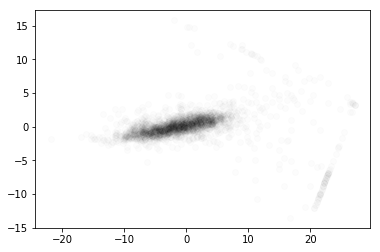

{'n_components': 2, 'copy': True, 'whiten': False, 'svd_solver': 'auto', 'tol': 0.0, 'iterated_power': 'auto', 'random_state': None, 'mean_': array([6.0957964 , 6.08895862, 6.2294376 , 5.21987695, 5.90715747,
       6.09681739, 6.13311856, 6.15635516, 6.26112483, 5.98220107,
       5.64110117, 5.99850849]), 'n_samples_': 2111, 'n_features_': 12, 'components_': array([[-0.22664902, -0.22406958, -0.21382961, -0.3444818 , -0.32763946,
        -0.30708883, -0.25881359, -0.26640351, -0.28143014, -0.30538261,
        -0.34654669, -0.31917032],
       [-0.5127328 , -0.53856954, -0.51324202,  0.01523175,  0.08448401,
         0.11079403,  0.2114885 ,  0.1982125 ,  0.16812995,  0.1557835 ,
         0.10476032,  0.12829344]]), 'n_components_': 2, 'explained_variance_': array([49.36316299,  5.69466252]), 'explained_variance_ratio_': array([0.83261307, 0.0960524 ]), 'singular_values_': array([322.73251139, 109.61632143]), 'noise_variance_': 0.42292128210810065}


In [14]:
import sklearn
from sklearn.decomposition import PCA

plt.clf()
X = mat#np.array([[-1, -1, 0], [-2, -1, 0], [-3, -2, 0], [1, 1, 9], [2, 1, 9], [3, 2, 9]])
print("Dimensions:", len(X[:,0]), len(X[0,:]))
print(X)

plt.scatter(X[:,0], X[:,1])
plt.show()
plt.clf()

pca = PCA(n_components=2)
pca.fit(X)

X_r = pca.fit(X).transform(X)
print(X_r)

plt.scatter(X_r[:,0], X_r[:,1], alpha=0.01, color='k')
plt.show()
plt.clf()

#plt.hexbin(X_r[:,0], X_r[:,1])#, alpha=0.01, color='k')
#plt.show()
#plt.clf()

print(pca.__dict__)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

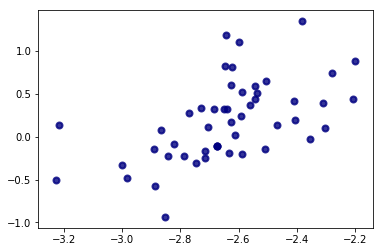

turquoise 1 versicolor


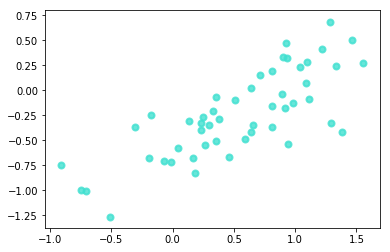

darkorange 2 virginica


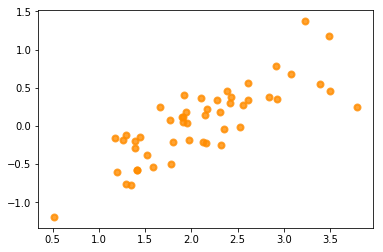

/Users/dfporter/pma/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


NameError: name 'X_r2' is not defined

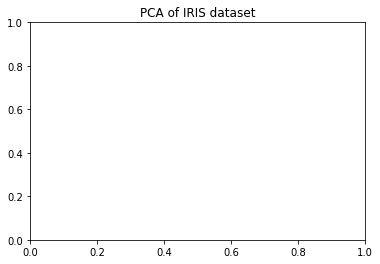

In [15]:

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

print(X)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
print(X_r)
#lda = LinearDiscriminantAnalysis(n_components=2)
#X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    print(color, i, target_name)
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    plt.show()
    plt.clf()
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import mpld3
from mpld3 import plugins
%matplotlib inline

iris = sb.load_dataset('iris')
from sklearn.preprocessing import StandardScaler
X = pd.get_dummies(iris)
X_scal = StandardScaler().fit_transform(X)

dim = 3
from sklearn.decomposition import PCA
pca = PCA(n_components = dim)
Y_sklearn = pca.fit_transform(X_scal)

# Define some CSS to control our custom labels
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""

fig, ax = plt.subplots(dim,dim, figsize=(6,6))
fig.subplots_adjust(hspace=.4, wspace=.4)
tooltip = [None]*dim

N = 200
index = np.random.choice(range(Y_sklearn.shape[0]),size=N)

for m in range(dim):
    for n in range(m+1):
        ax[m,n].grid(True, alpha=0.3)
        scatter = ax[m,n].scatter(Y_sklearn[index,m],Y_sklearn[index,n],alpha=.05)

        labels = []
        for i in index:
            label = X.ix[[i], :].T.astype(int)
            label.columns = ['Row {0}'.format(X.index[i])]
            labels.append(str(label.to_html()))

        ax[m,n].set_xlabel('Component ' + str(m) )
        ax[m,n].set_ylabel('Component ' + str(n) )
        #ax[m,n].set_title('HTML tooltips', size=20)

        tooltip[m] = plugins.PointHTMLTooltip(scatter, labels,
                                           voffset=20, hoffset=20, css=css)
        plugins.connect(fig, tooltip[m])

plugins.connect(fig, plugins.LinkedBrush(scatter))
test = mpld3.fig_to_html(fig=fig)

with open("Output.html", "w") as text_file:
    text_file.write(test)


In [ ]:


from plotly.offline import plot
from plotly.graph_objs import *
import numpy as np

# x = np.random.randn(2000)
# y = np.random.randn(2000)

# Instead of simply calling plot(...), store your plot as a variable and pass it to displayHTML().
# Make sure to specify output_type='div' as a keyword argument.
# (Note that if you call displayHTML() multiple times in the same cell, only the last will take effect.)

p = plot(
  [
    Scatter3d(x=skills_df[0], y=skills_df[1], z=skills_df[2], text= skills_df['designation'], mode='markers', marker=Marker(color=skills_df['cluster_number'], size=3, opacity=0.5, colorscale='Viridis'))
  ],
  output_type='div'
#   filename='/dbfs/FileStore/tables/lnkdn_jobroles_viridis.html' turn it on to save the file
)


In [11]:
s = 'TGAGTTCTGGTGGATGGTACGGAGCGGTGAG AAACA GAACCGCTCTTCCGATCT.'
print(s[::-1])

.TCTAGCCTTCTCGCCAAG ACAAA GAGTGGCGAGGCATGGTAGGTGGTCTTGAGT


In [13]:
s = 'CTC CGT ACC ATC CAC CAG AAC TCA ACG ATC AGC GAT CTC GTA TGC CGT CTT CTG CTT G '
print(''.join([x for x in s if x!= ' ']))

CTCCGTACCATCCACCAGAACTCAACGATCAGCGATCTCGTATGCCGTCTTCTGCTTG
